In [ ]:
from google.colab import files
uploaded = files.upload()

Input: Dear , We would like to understand your payment experience for your recent purchase on Flipkart so that we can ensure a seamless experience for you in the future.Please fill in the survey form here.In case you are not comfortable answering any question, you may choose to skip it and move to the next one.Thanks, Flipkart Team
Result: Non-malicious
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         3

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

  (0, 188)	0.07182517689678254
  (0, 554)	0.05902787572678196
  (0, 779)	0.09393454308248415
  (0, 672)	0.12389667159232533
  (0, 553)	0.0883891965482395
  (0, 699)	0.11274861164488996
  (0, 226)	0.1507570395513793
  (0, 448)	0.13960897960394397
  (0, 44)	0.0753504533532507
  (0, 526)	0.093934543082484

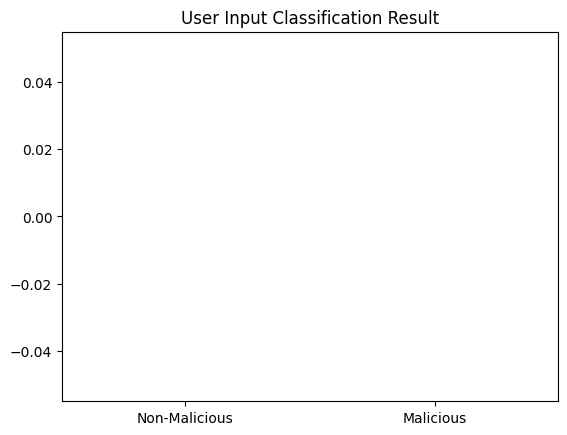

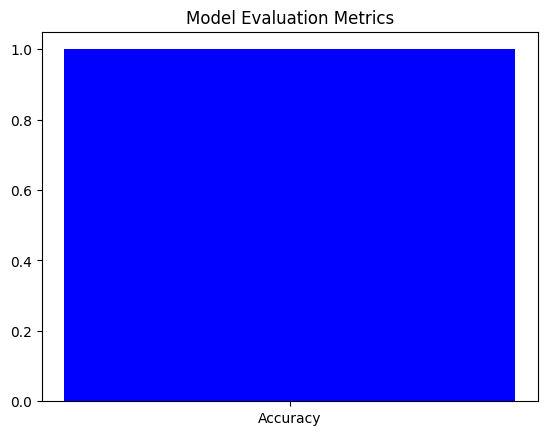

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the datasets
good_text = pd.read_csv('Good_text.csv')
bad_text = pd.read_csv('Bad_text_new.csv')

# Label the data
good_text['label'] = 0  # Non-malicious
bad_text['label'] = 1   # Malicious

# Combine the datasets and shuffle the data
combined_data = pd.concat([good_text, bad_text], ignore_index=True)
combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Handling missing values by filling NaN with empty string
combined_data['Body'].fillna('', inplace=True)

# Text preprocessing and feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust the number of features as needed
X = tfidf_vectorizer.fit_transform(combined_data['Body'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, combined_data['label'], test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# User input
user_input = ["Dear , We would like to understand your payment experience for your recent purchase on Flipkart so that we can ensure a seamless experience for you in the future.Please fill in the survey form here.In case you are not comfortable answering any question, you may choose to skip it and move to the next one.Thanks, Flipkart Team"]

# Preprocess and predict user input
user_input_transformed = tfidf_vectorizer.transform(user_input)
user_predictions = model.predict(user_input_transformed)

for i, text in enumerate(user_input):
    print(f"Input: {text}")
    if user_predictions[i] == 1:
        print("Result: Malicious")
    else:
        print("Result: Non-malicious")

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)
print(X)



# Create a bar chart to visualize the result
plt.bar(["Non-Malicious", "Malicious"], user_predictions, color=['green', 'red'])
plt.title("User Input Classification Result")
plt.show()

# Create a bar chart for model evaluation
evaluation_chart = [accuracy]  # You can add more metrics to this list if needed
metrics = ["Accuracy"]  # You can add more metric names to this list

plt.bar(metrics, evaluation_chart, color='blue')
plt.title("Model Evaluation Metrics")
plt.show()

Input: Dear , We would like to understand your payment experience for your recent purchase on Flipkart so that we can ensure a seamless experience for you in the future.Please fill in the survey form here.In case you are not comfortable answering any question, you may choose to skip it and move to the next one.Thanks, Flipkart Team
Result: Non-malicious
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         3

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



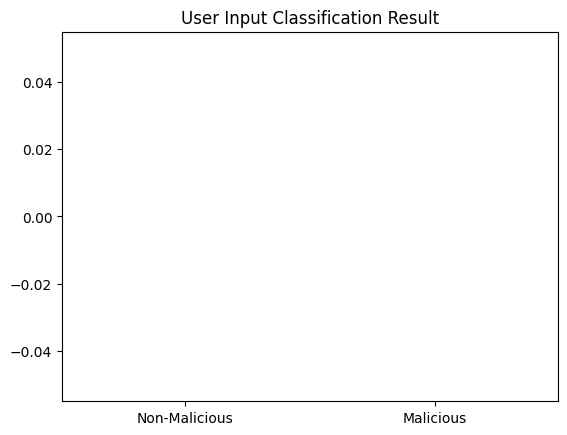

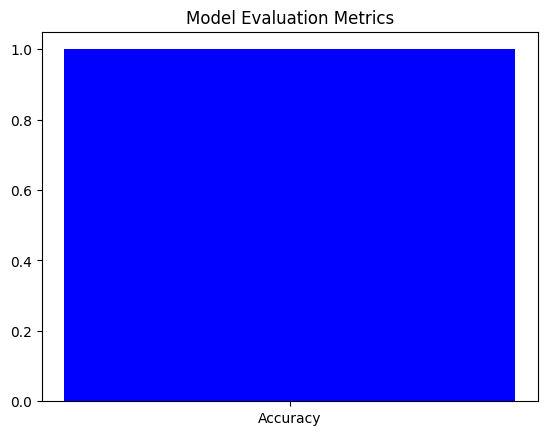

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the datasets
good_text = pd.read_csv('Good_text.csv')
bad_text = pd.read_csv('Bad_text_new.csv')

# Label the data
good_text['label'] = 0  # Non-malicious
bad_text['label'] = 1   # Malicious

# Combine the datasets and shuffle the data
combined_data = pd.concat([good_text, bad_text], ignore_index=True)
combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Handling missing values by filling NaN with empty string
combined_data['Body'].fillna('', inplace=True)

# Text preprocessing and feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust the number of features as needed
X = tfidf_vectorizer.fit_transform(combined_data['Body'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, combined_data['label'], test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# User input
user_input = ["Dear , We would like to understand your payment experience for your recent purchase on Flipkart so that we can ensure a seamless experience for you in the future.Please fill in the survey form here.In case you are not comfortable answering any question, you may choose to skip it and move to the next one.Thanks, Flipkart Team"]

# Preprocess and predict user input
user_input_transformed = tfidf_vectorizer.transform(user_input)
user_predictions = model.predict(user_input_transformed)

for i, text in enumerate(user_input):
    print(f"Input: {text}")
    if user_predictions[i] == 1:
        print("Result: Malicious")
    else:
        print("Result: Non-malicious")

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)


# Create a bar chart to visualize the result
plt.bar(["Non-Malicious", "Malicious"], user_predictions, color=['green', 'red'])
plt.title("User Input Classification Result")
plt.show()

# Create a bar chart for model evaluation
evaluation_chart = [accuracy]  # You can add more metrics to this list if needed
metrics = ["Accuracy"]  # You can add more metric names to this list

plt.bar(metrics, evaluation_chart, color='blue')
plt.title("Model Evaluation Metrics")
plt.show()

USING NAIVE BAYES

Result: Non-malicious
dear , we would like to understand your payment experi for your recent purchas on flipkart so that we can ensur a seamless experi for you in the future.pleas fill in the survey form here.in case you are not comfort answer ani question, you may choos to skip it and move to the next one.thanks, flipkart teamdear , we would like to understand your payment experi for your recent purchas on flipkart so that we can ensur a seamless experi for you in the future.pleas fill in the survey form here.in case you are not comfort answer ani question, you may choos to skip it and move to the next one.thanks, flipkart team
TF-IDF vectorization   (0, 199)	0.07301145583812713
  (0, 544)	0.06000279189061704
  (0, 782)	0.10206646966800531
  (0, 658)	0.13312486491517872
  (0, 543)	0.09256677208666782
  (0, 683)	0.11461079019340063
  (0, 232)	0.15324697287289776
  (0, 55)	0.07659495646338135
  (0, 517)	0.08491870569873125
  (0, 521)	0.10997115809821949
  (0, 403)	0.07133497541872236
  

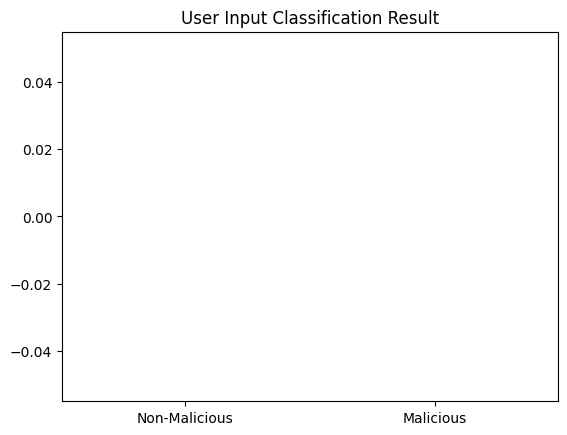

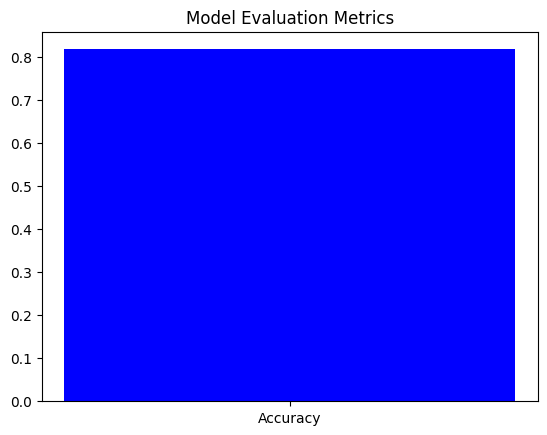

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt


# Load the datasets
good_text = pd.read_csv('Good_text.csv')
bad_text = pd.read_csv('Bad_text_new.csv')

# Label the data
good_text['label'] = 0  # Non-malicious
bad_text['label'] = 1   # Malicious

# Combine the datasets and shuffle the data
combined_data = pd.concat([good_text, bad_text], ignore_index=True)
combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Ensure that the 'Body' column contains valid text data
combined_data['Body'] = combined_data['Body'].astype(str)

# Text preprocessing
stemmer = PorterStemmer()
combined_data['Body'] = combined_data['Body'].apply(lambda text: ' '.join([stemmer.stem(word) for word in text.split()]))

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(combined_data['Body'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, combined_data['label'], test_size=0.2, random_state=42)

# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# User input
user_input = ["Dear , We would like to understand your payment experience for your recent purchase on Flipkart so that we can ensure a seamless experience for you in the future.Please fill in the survey form here.In case you are not comfortable answering any question, you may choose to skip it and move to the next one.Thanks, Flipkart Team""Dear , We would like to understand your payment experience for your recent purchase on Flipkart so that we can ensure a seamless experience for you in the future.Please fill in the survey form here.In case you are not comfortable answering any question, you may choose to skip it and move to the next one.Thanks, Flipkart Team"]# Replace with your input

# Preprocess user input
user_input = ' '.join([stemmer.stem(word) for word in user_input[0].split()])
user_input_transformed = tfidf_vectorizer.transform([user_input])

# Predict user input
user_predictions = nb_model.predict(user_input_transformed)

if user_predictions[0] == 1:
    print("Result: Malicious")
else:
    print("Result: Non-malicious")

# Evaluate the model
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(user_input)
print("TF-IDF vectorization",X)
print(f"Accuracy: {accuracy}")
print(report)
print("# Preprocess user input",user_input_transformed )
print("Stemming",combined_data['Body'])


# Create a bar chart to visualize the result
plt.bar(["Non-Malicious", "Malicious"], user_predictions, color=['green', 'red'])
plt.title("User Input Classification Result")
plt.show()

# Create a bar chart for model evaluation
evaluation_chart = [accuracy]  # You can add more metrics to this list if needed
metrics = ["Accuracy"]  # You can add more metric names to this list

plt.bar(metrics, evaluation_chart, color='blue')
plt.title("Model Evaluation Metrics")
plt.show()


